### ***INTRODUCCION***

He sido contratado como asistente de análisis de datos en Telecom X y formare parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import requests
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
# Cargar datos desde URL y convertir a DataFrame

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    # Obtener los datos
    response = requests.get(url)
    response.raise_for_status() # Lanza una excepción para códigos de estado de error (4xx o 5xx)

    # Parsear los datos como JSON
    data = response.json()

    # Convertir a DataFrame
    df = pd.DataFrame(data)

    print(" Datos cargados exitosamente. Vista previa:")
    display(df.head())

except requests.exceptions.RequestException as e:
    print(f" Error al obtener los datos de la URL: {e}")
    # Asegurar que df no está definido si falla la carga
    df = None

except ValueError as e:
    print(f" Error al decodificar JSON desde la respuesta: {e}")
    # Asegurar que df no está definido si falla la decodificación
    df = None

except Exception as e:
    print(f" Error inesperado durante el proceso: {e}")
    # Asegurar que df no está definido si ocurre otro error
    df = None

 Datos cargados exitosamente. Vista previa:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [21]:
# Verifica si el DataFrame se creó correctamente antes de usarlo
if df is not None:
    print("\nVista previa del DataFrame usando df.head():")
    display(df.head())
else:
    print("\n El DataFrame 'df' no se creó correctamente debido a errores previos.")


Vista previa del DataFrame usando df.head():


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [22]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [23]:
try:
    # Normalizar columnas anidadas con prefijos para evitar colisiones de nombres
    customer_df = pd.json_normalize(df['customer'], sep='_').add_prefix('customer_')
    phone_df    = pd.json_normalize(df['phone'], sep='_').add_prefix('phone_')
    internet_df = pd.json_normalize(df['internet'], sep='_').add_prefix('internet_')
    account_df  = pd.json_normalize(df['account'], sep='_').add_prefix('account_')

    # Eliminar columnas anidadas originales y concatenar las nuevas
    df = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1, errors='ignore'),
        customer_df,
        phone_df,
        internet_df,
        account_df
    ], axis=1)

    print("✅ Columnas normalizadas y concatenadas correctamente.")
    display(df.head())

except KeyError as ke:
    print(f"❌ Clave no encontrada al intentar normalizar: {ke}")
except Exception as e:
    print(f"⚠️ Error inesperado durante la normalización: {e}")

✅ Columnas normalizadas y concatenadas correctamente.


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###***Limpieza de Datos***


In [24]:
def load_and_clean_data_json(url):
    """Carga y limpia dataset desde JSON anidado"""

    import requests
    import json

    # Descargar JSON
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear DataFrame base
    df = pd.DataFrame(data)

    # Normalizar columnas anidadas
    customer_df = pd.json_normalize(df['customer'])
    phone_df = pd.json_normalize(df['phone'])
    internet_df = pd.json_normalize(df['internet'])
    account_df = pd.json_normalize(df['account'])

    # Concatenar todo en un solo df
    df = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        customer_df, phone_df, internet_df, account_df
    ], axis=1)

    # Limpieza básica
    df_clean = df.copy()
    # Ajusta nombres de columnas según corresponda:
    if 'account_churn' in df_clean.columns:
        df_clean['account_churn'] = df_clean['account_churn'].map({'Yes': 1, 'No': 0})
    if 'customer_SeniorCitizen' in df_clean.columns:
        df_clean['customer_SeniorCitizen'] = df_clean['customer_SeniorCitizen'].map({0: 'No', 1: 'Yes'})

    # Eliminar columnas innecesarias si existen
    cols_to_drop = ['customer_customerID', 'Unnamed: 0']
    df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns], errors='ignore')

    return df_clean


### ***Analisis de Datos***

In [25]:
def cramers_v(x, y, verbose=False):
    """
    Calcula el coeficiente V de Cramer corregido entre dos variables categóricas.

    Parámetros:
        x, y (pd.Series): Variables categóricas
        verbose (bool): Si True, muestra detalles intermedios

    Retorna:
        v (float): Valor de Cramér's V
        chi2 (float): Estadístico Chi-cuadrado
        n (int): Total de observaciones
    """
    try:
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape

        phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)

        v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        if verbose:
            print(f"Chi2: {chi2:.4f}")
            print(f"Total N: {n}")
            print(f"Phi²: {phi2:.4f}, Corregido: {phi2corr:.4f}")
            print(f"Dimensiones: r={r}, k={k}")
            print(f"Cramér's V: {v:.4f}")

        return v, chi2, n

    except Exception as e:
        if verbose:
            print(f"⚠️ Error al calcular Cramér's V: {e}")
        return 0.0, 0.0, 0


In [26]:
def plot_distributions(df, columns, hue='account_churn', max_cols=3):
    """Visualiza distribuciones de variables categóricas con countplot"""

    valid_columns = [col for col in columns if col in df.columns]
    n_plots = len(valid_columns)
    n_rows = (n_plots + max_cols - 1) // max_cols

    plt.figure(figsize=(6 * max_cols, 4.5 * n_rows))

    for i, col in enumerate(valid_columns, 1):
        plt.subplot(n_rows, max_cols, i)
        sns.countplot(data=df, x=col, hue=hue)
        plt.title(f'{col} vs {hue}', fontsize=13)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Cantidad')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


In [27]:
def plot_correlations(df, num_cols, cat_cols):
    """Visualiza correlaciones entre variables numéricas y categóricas"""

    # Correlación entre variables numéricas
    if num_cols:
        plt.figure(figsize=(10, 8))
        corr = df[num_cols].corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)
        plt.title('Correlación entre Variables Numéricas')
        plt.show()

    # Correlación entre variables categóricas (Cramér's V)
    if cat_cols:
        cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
        for col1 in cat_cols:
            for col2 in cat_cols:
                try:
                    v, _, _ = cramers_v(df[col1], df[col2])
                    cramer_matrix.loc[col1, col2] = v
                except:
                    cramer_matrix.loc[col1, col2] = np.nan

        plt.figure(figsize=(14, 12))
        sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
        plt.title("Correlación entre Variables Categóricas (V de Cramér)")
        plt.show()


In [28]:
def plot_numerical_vs_churn(df, num_cols, hue='account_churn'):
    """Visualiza la relación entre variables numéricas y churn con boxplots"""

    n = len(num_cols)
    n_cols = min(3, n)
    n_rows = (n + n_cols - 1) // n_cols

    plt.figure(figsize=(6 * n_cols, 4.5 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        try:
            sns.boxplot(data=df, x=hue, y=col)
            plt.title(f'{col} vs {hue}')
            plt.xlabel(hue)
            plt.ylabel(col)
        except Exception as e:
            plt.text(0.5, 0.5, f'Error en {col}\n{e}', ha='center', va='center')
            plt.axis('off')

    plt.tight_layout()
    plt.show()


In [29]:
def load_and_clean_data_json(url):
    """Carga y limpia dataset desde JSON anidado"""

    import requests
    import json
    import pandas as pd # Add this line to import pandas inside the function

    # Descargar JSON
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear DataFrame base
    df = pd.DataFrame(data)

    # Normalizar columnas anidadas
    customer_df = pd.json_normalize(df['customer'])
    phone_df = pd.json_normalize(df['phone'])
    internet_df = pd.json_normalize(df['internet'])
    account_df = pd.json_normalize(df['account'])

    # Concatenar todo en un solo df
    df = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        customer_df, phone_df, internet_df, account_df
    ], axis=1)

    # Limpieza básica
    df_clean = df.copy()
    # Ajusta nombres de columnas según corresponda:
    if 'account_churn' in df_clean.columns:
        df_clean['account_churn'] = df_clean['account_churn'].map({'Yes': 1, 'No': 0})
    if 'customer_SeniorCitizen' in df_clean.columns:
        df_clean['customer_SeniorCitizen'] = df_clean['customer_SeniorCitizen'].map({0: 'No', 1: 'Yes'})

    # Eliminar columnas innecesarias si existen
    cols_to_drop = ['customer_customerID', 'Unnamed: 0']
    df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns], errors='ignore')

    return df_clean



In [30]:
def analyze_segments(df_clean, segment_cols, target='Churn', palette_name='husl'):
    """Analiza tasas de churn por segmentos con estilo minimalista

    Args:
        df (pd.DataFrame): DataFrame con los datos
        segment_cols (list): Lista de columnas para segmentar
        target (str): Columna objetivo (default 'Churn')
        palette_name (str): Nombre de la paleta de colores (default 'husl')
    """
    # Configuración de estilo minimalista
    sns.set(style="white")  # Elimina fondos y líneas innecesarias

    for col in segment_cols:
        # Crear figura sin márgenes superiores y derechos
        fig, ax = plt.subplots(figsize=(10, 5))

        # Calcular datos para el gráfico
        segment_data = df_clean.groupby(col)[target].mean().sort_values(ascending=False)

        # Crear paleta de colores
        custom_palette = sns.color_palette(palette_name, len(segment_data.index))

        # Crear gráfico de barras
        sns.barplot(x=segment_data.index,
                   y=segment_data.values,
                   palette=custom_palette,
                   ax=ax)

        # Personalización minimalista
        ax.set_title(f'Tasa de Churn por {col}', fontsize=14, pad=15)
        ax.set_ylabel('Tasa de Churn', fontsize=12)
        ax.set_xlabel('')

        # Añadir valores en las barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1%}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=10)

        # Eliminar bordes/márgenes superiores y derechos
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Ajustar layout para minimizar espacios en blanco
        plt.tight_layout()
        plt.show()

        # Mostrar tabla con conteos (formato mejorado)
        print(f"\nDistribución y churn por {col}:")
        display(pd.concat([
            df_clean[col].value_counts(normalize=True).rename('Distribución').mul(100).round(1).astype(str) + '%',
            df_clean.groupby(col)[target].mean().rename('Tasa Churn').mul(100).round(1).astype(str) + '%'
        ], axis=1).sort_values('Tasa Churn', ascending=False))



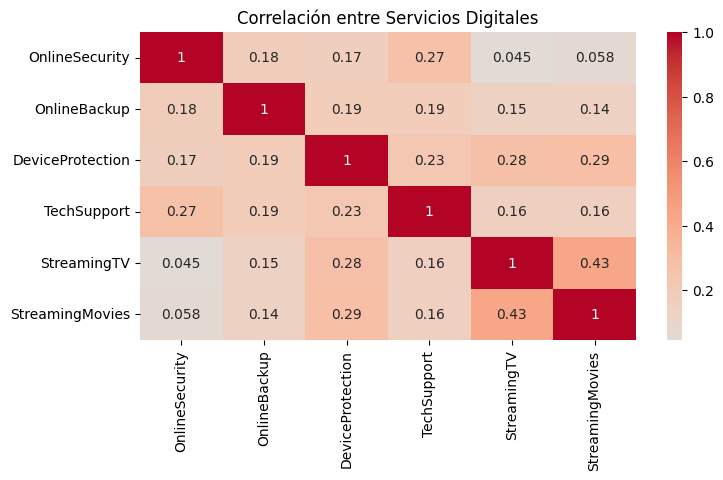

KeyError: 'NumServices'

In [37]:
# Análisis de correlación entre servicios digitales
digital_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
service_corr = df[digital_services].apply(lambda x: x.map({'Yes': 1, 'No': 0})).corr()

plt.figure(figsize=(8,4))
sns.heatmap(service_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Servicios Digitales')
plt.show()

# # Gráfico interactivo de churn por tipo de cliente (Premium) con paleta 'Inferno'
# # Esta sección causa un KeyError porque la columna 'PremiumCustomer' no existe.
# # Comentar la sección hasta que la columna 'PremiumCustomer' sea creada o identificada.
# fig_premium = px.bar(
#     df.groupby('PremiumCustomer')['Churn'].mean().reset_index(),
#     x='PremiumCustomer', y='Churn',
#     title='Tasa de Churn por Tipo de Cliente',
#     labels={'Churn': 'Tasa de Churn', 'PremiumCustomer': 'Cliente Premium'},
#     color='Churn',
#     color_continuous_scale='Inferno',
#     width=1000,  # 10 pulgadas
#     height=500   # 5 pulgadas
# )
# fig_premium.update_xaxes(tickvals=[0, 1], ticktext=['No Premium', 'Premium'])
# fig_premium.show()

# Preparamos los datos: porcentaje de Churn por tipo de contrato
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn = contract_churn.reset_index().melt(id_vars='Contract', value_name='Percentage', var_name='Churn')

# Filtramos solo los casos de Churn='Yes' para visualización más clara
churn_rates = contract_churn[contract_churn['Churn'] == 'Yes']

# Creamos el gráfico de barras interactivo
import plotly.express as px # Import plotly.express if not already imported

fig = px.bar(churn_rates,
             x='Contract',
             y='Percentage',
             color='Contract',
             text='Percentage',
             title='Tasa de Churn por Tipo de Contrato',
             labels={'Percentage': 'Porcentaje de Churn (%)', 'Contract': 'Tipo de Contrato'},
             color_discrete_map={
                 'Month-to-month': '#EF553B',
                 'One year': '#00CC96',
                 'Two year': '#636EFA'
             })

# Personalizamos el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    yaxis_range=[0, 50],  # Ajustamos el rango para mejor visualización
    annotations=[
        dict(
            x=1,  # Contrato de 1 año
            y=12,
            xref="x",
            yref="y",
            text="<10% Churn",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=2,  # Contrato de 2 años
            y=3,
            xref="x",
            yref="y",
            text="<5% Churn",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=0,  # Mes a mes
            y=45,
            xref="x",
            yref="y",
            text="Alto Churn (>40%)",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=40
        )
    ]
)

# Añadimos línea horizontal de referencia al 10%
fig.add_hline(y=10, line_dash="dot", line_color="red",
              annotation_text="Umbral del 10%",
              annotation_position="bottom right")

fig.show()


# Gráfico interactivo de churn por número de servicios con paleta 'Cividis'
# Assuming 'NumServices' and 'Churn' columns exist
# If 'Churn' is not the correct column name, replace it with the actual churn column (e.g., 'account_churn')
# If 'NumServices' does not exist, you might need to create it based on the service columns.
fig_services = px.bar(
    df.groupby('NumServices')['Churn'].mean().reset_index(),
    x='NumServices', y='Churn',
    title='Tasa de Churn por Número de Servicios',
    labels={'Churn': 'Tasa de Churn', 'NumServices': 'Número de Servicios'},
    color='Churn',
    color_continuous_scale='Cividis',
    width=1000,  # 10 pulgadas
    height=500   # 5 pulgadas
    )
# Correcting the variable name from fig_contract to fig_services
fig_services.show()

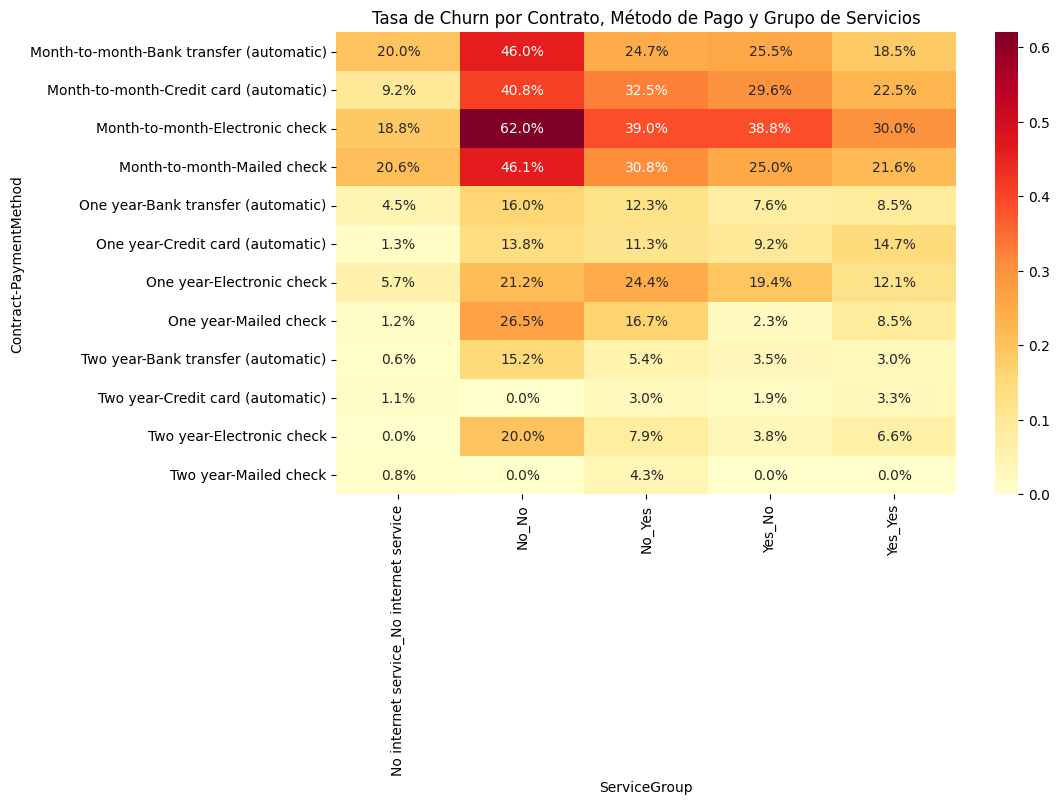

In [39]:
# Segmentación avanzada

# Ensure the 'Churn' column is numeric (assuming 'Yes'/'No' strings)
# Based on your cleaning function, we map 'Yes' to 1 and 'No' to 0.
# If the column name is actually 'account_churn', use 'account_churn' instead of 'Churn'.
# Check the column names in your df DataFrame to confirm.

# Initialize churn_column before the if/elif/else block
churn_column = None

if 'Churn' in df.columns:
    # Check if the column needs mapping (i.e., it's not already numeric)
    if df['Churn'].dtype == 'object':
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    # Assign 'Churn' to churn_column if it exists and is handled
    churn_column = 'Churn'
elif 'account_churn' in df.columns:
     # If 'Churn' doesn't exist but 'account_churn' does, use that and map
     if df['account_churn'].dtype == 'object':
        df['account_churn'] = df['account_churn'].map({'Yes': 1, 'No': 0})
     # Assign 'account_churn' to churn_column
     print("Warning: 'Churn' column not found, using 'account_churn' instead.")
     churn_column = 'account_churn'
else:
    print("Error: Neither 'Churn' nor 'account_churn' column found for analysis.")
    # churn_column remains None in this case, which is handled by the next if condition


if churn_column:
    # Ensure columns used to create 'ServiceGroup' also exist
    if 'OnlineSecurity' in df.columns and 'TechSupport' in df.columns:
        df['ServiceGroup'] = df['OnlineSecurity'] + '_' + df['TechSupport']
        # Use the correct column name for churn
        # Ensure 'Contract' and 'PaymentMethod' exist before grouping
        if 'Contract' in df.columns and 'PaymentMethod' in df.columns and 'ServiceGroup' in df.columns:
            contract_payment_churn = df.groupby(['Contract', 'PaymentMethod', 'ServiceGroup'])[churn_column].mean().unstack()

            plt.figure(figsize=(10,6))
            sns.heatmap(contract_payment_churn, annot=True, fmt='.1%', cmap='YlOrRd')
            plt.title('Tasa de Churn por Contrato, Método de Pago y Grupo de Servicios')
            plt.show()
        else:
            print("Skipping heatmap due to missing required columns ('Contract', 'PaymentMethod', or 'ServiceGroup').")
    else:
        print("Skipping heatmap due to missing service columns ('OnlineSecurity' or 'TechSupport') for ServiceGroup.")
else:
    print("Skipping heatmap due to missing churn column.")

<ipython-input-40-1828322985>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-40-1828322985>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




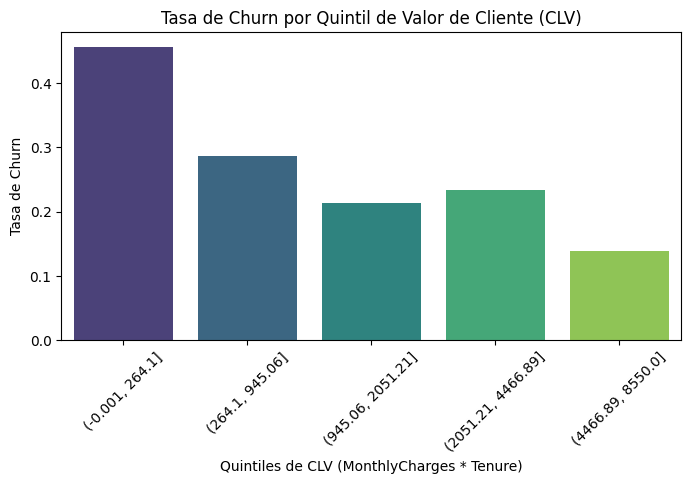

In [40]:
df['CLV'] = df['Charges.Monthly'] * df['tenure']
churn_clv = df.groupby(pd.qcut(df['CLV'], q=5))['Churn'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=churn_clv.index.astype(str), y=churn_clv.values, palette='viridis')
plt.title('Tasa de Churn por Quintil de Valor de Cliente (CLV)')
plt.ylabel('Tasa de Churn')
plt.xlabel('Quintiles de CLV (MonthlyCharges * Tenure)')
plt.xticks(rotation=45)
plt.show()